In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Reading excel file
ds = pd.read_excel('covid19_clinical_dataset.xlsx')
ds

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Reading head of the data
ds.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Checking the initial shape of the dataset as how many rows and columns are present in it
ds.shape

(5644, 111)

In [5]:
# Removing the duplicate rows from the dataset

print ('Shape of dataset before removing duplicates: ', ds.shape)
# Dropping the duplicate rows
ds = ds.drop_duplicates(keep='first')
print ('Shape of dataset after removing duplicates: ', ds.shape)

Shape of dataset before removing duplicates:  (5644, 111)
Shape of dataset after removing duplicates:  (5644, 111)


In [6]:
# Checking the columns of the dataset as on which features, 'Total death' is dependent
ds.columns

Index(['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       ...
       'Hb saturation (arterial blood gases)',
       'pCO2 (arterial blood gas analysis)',
       'Base excess (arterial blood gas analysis)',
       'pH (arterial blood gas analysis)',
       'Total CO2 (arterial blood gas analysis)',
       'HCO3 (arterial blood gas analysis)',
       'pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor',
       'ctO2 (arterial blood gas analysis)'],
      dtype='object', length=111)

In [7]:
# Checking the datatypes of the columns
ds.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object

In [8]:
# Checking the columns information
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [9]:
# identifying the number columns
ds_int = ds.select_dtypes(include=['int64', 'int32', 'float'])
ds_int.columns

Index(['Patient age quantile',
       'Patient addmited to regular ward (1=yes, 0=no)',
       'Patient addmited to semi-intensive unit (1=yes, 0=no)',
       'Patient addmited to intensive care unit (1=yes, 0=no)', 'Hematocrit',
       'Hemoglobin', 'Platelets', 'Mean platelet volume ', 'Red blood Cells',
       'Lymphocytes', 'Mean corpuscular hemoglobin concentration (MCHC)',
       'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)',
       'Eosinophils', 'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)', 'Serum Glucose',
       'Mycoplasma pneumoniae', 'Neutrophils', 'Urea',
       'Proteina C reativa mg/dL', 'Creatinine', 'Potassium', 'Sodium',
       'Alanine transaminase', 'Aspartate transaminase',
       'Gamma-glutamyltransferase ', 'Total Bilirubin', 'Direct Bilirubin',
       'Indirect Bilirubin', 'Alkaline phosphatase', 'Ionized calcium ',
       'Magnesium', 'pCO2 (venous blood gas analysis)',
       'Hb saturation (

In [10]:
# identifying the category columns
ds_cat = ds.select_dtypes(include=['object'])
ds_cat.columns

Index(['Patient ID', 'SARS-Cov-2 exam result', 'Respiratory Syncytial Virus',
       'Influenza A', 'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63',
       'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3',
       'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4',
       'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009',
       'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2',
       'Influenza B, rapid test', 'Influenza A, rapid test', 'Strepto A',
       'Urine - Esterase', 'Urine - Aspect', 'Urine - pH',
       'Urine - Hemoglobin', 'Urine - Bile pigments', 'Urine - Ketone Bodies',
       'Urine - Nitrite', 'Urine - Urobilinogen', 'Urine - Protein',
       'Urine - Leukocytes', 'Urine - Crystals', 'Urine - Hyaline cylinders',
       'Urine - Granular cylinders', 'Urine - Yeasts', 'Urine - Color'],
      dtype='object')

# Statistical Summary

In [11]:
ds.describe()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,...,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
mean,9.318391,0.013997,0.008859,0.007264,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,...,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.019049e+00,1.025978e+00,1.025978e+00,1.019049e+00
min,0.000000,0.000000,0.000000,0.000000,-4.501420e+00,-4.345603e+00,-2.552426e+00,-2.457575e+00,-3.970608e+00,-1.865070e+00,...,-1.999560e+00,-1.244817e+00,-3.082674e+00,-3.568877e+00,-2.925618e+00,-2.985592e+00,-1.175907e+00,-1.532932e+00,-1.480526e+00,-2.900254e+00
25%,4.000000,0.000000,0.000000,0.000000,-5.188074e-01,-5.862439e-01,-6.053457e-01,-6.624832e-01,-5.679496e-01,-7.307069e-01,...,-1.122574e+00,-5.348102e-01,-3.308668e-01,-9.210583e-02,-5.117720e-01,-5.397211e-01,-8.169898e-01,-1.214975e-01,-5.527296e-01,-4.852787e-01
50%,9.000000,0.000000,0.000000,0.000000,5.340703e-02,4.031596e-02,-1.217160e-01,-1.015171e-01,1.385207e-02,-1.426696e-02,...,2.677689e-01,-2.120799e-01,-1.181667e-02,2.942021e-01,7.743482e-02,5.633191e-02,-1.599549e-01,-1.174366e-02,-1.381825e-01,1.826928e-01
75%,14.000000,0.000000,0.000000,0.000000,7.171751e-01,7.295320e-01,5.314981e-01,6.838353e-01,6.661759e-01,5.976919e-01,...,7.383496e-01,2.305214e-02,6.661649e-01,5.115003e-01,4.385609e-01,5.085100e-01,4.500090e-01,-1.174366e-02,2.763648e-01,5.937525e-01
max,19.000000,1.000000,1.000000,1.000000,2.662704e+00,2.671868e+00,9.532034e+00,3.713052e+00,3.645706e+00,3.764100e+00,...,1.337265e+00,3.236524e+00,1.703078e+00,1.042674e+00,1.940087e+00,2.029471e+00,2.205371e+00,2.841856e+00,2.862350e+00,1.826932e+00


Mean is greater than median, outliers are present in the dataset

In [12]:
# Checking for null values
ds.isnull().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

In [13]:
# Checking for NaN values
ds.isna().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

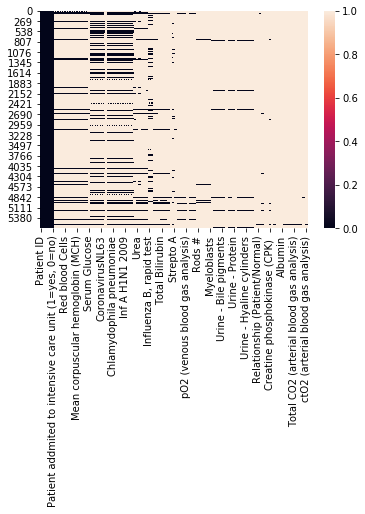

In [14]:
# Checking null values through heatmap visualization
sns.heatmap(ds.isnull())

# Getting the unique values of target columns

In [15]:
ds['Patient addmited to regular ward (1=yes, 0=no)'].unique()

array([0, 1], dtype=int64)

In [16]:
ds['Patient addmited to semi-intensive unit (1=yes, 0=no)'].unique()

array([0, 1], dtype=int64)

In [17]:
ds['Patient addmited to intensive care unit (1=yes, 0=no)'].unique()

array([0, 1], dtype=int64)

In [18]:
ds['SARS-Cov-2 exam result'].unique()

array(['negative', 'positive'], dtype=object)

# Checking the corelation

In [19]:
ds.corr()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient age quantile,1.000000,0.046166,0.015736,-0.035772,0.096808,0.060320,-0.158683,0.119449,-0.037510,-0.125935,...,-0.223949,-0.469049,0.570445,0.570755,0.086133,0.166245,-0.098422,-0.334562,-0.511705,-0.061265
"Patient addmited to regular ward (1=yes, 0=no)",0.046166,1.000000,-0.011264,-0.010192,-0.087241,-0.091867,-0.183091,-0.013134,-0.053143,-0.095313,...,0.198186,-0.226778,0.033456,0.203640,-0.159803,-0.133434,0.105608,-0.173663,NaN,0.273102
"Patient addmited to semi-intensive unit (1=yes, 0=no)",0.015736,-0.011264,1.000000,-0.008087,-0.182215,-0.177142,0.006966,-0.023475,-0.137951,-0.110574,...,-0.559117,0.113153,-0.226234,-0.178971,-0.112624,-0.136503,-0.338690,-0.091269,0.185231,-0.049042
"Patient addmited to intensive care unit (1=yes, 0=no)",-0.035772,-0.010192,-0.008087,1.000000,-0.183850,-0.178878,0.125953,-0.073511,-0.120659,-0.109867,...,0.351994,0.298040,0.203506,-0.179731,0.424729,0.410957,0.155628,0.348072,0.129927,-0.383220
Hematocrit,0.096808,-0.087241,-0.182215,-0.183850,1.000000,0.968447,-0.082296,0.083580,0.872987,0.002035,...,-0.046283,-0.180164,-0.195979,0.063842,-0.343724,-0.340215,0.124125,0.066204,0.172490,0.878029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HCO3 (arterial blood gas analysis),0.166245,-0.133434,-0.136503,0.410957,-0.340215,-0.420707,0.133917,0.266651,-0.267605,0.012786,...,-0.348558,0.513884,0.644222,-0.209320,0.992877,1.000000,-0.302613,0.104921,-1.000000,-0.434762
pO2 (arterial blood gas analysis),-0.098422,0.105608,-0.338690,0.155628,0.124125,0.081471,-0.138133,-0.226406,0.200226,0.057973,...,0.796438,-0.296518,-0.093285,0.200313,-0.314796,-0.302613,1.000000,-0.194277,-1.000000,0.270951
Arteiral Fio2,-0.334562,-0.173663,-0.091269,0.348072,0.066204,-0.003308,0.471555,0.079731,-0.257630,0.226611,...,-0.018400,0.400575,-0.262126,-0.387237,0.168055,0.104921,-0.194277,1.000000,1.000000,-0.212128
Phosphor,-0.511705,NaN,0.185231,0.129927,0.172490,0.259642,0.125356,-0.221918,0.189551,0.109370,...,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000


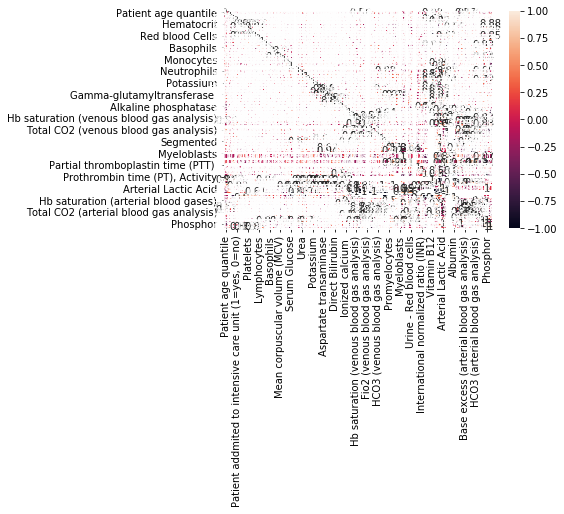

In [20]:
# checking the co relation through heatmap visualization
sns.heatmap(ds.corr(), annot=True)

Above heatmap shows the corelation between the different features of dataset.
Most of the columns are strongly corelated with each other.

# Plotting outliers

# Univariate Analysis

Boxplot

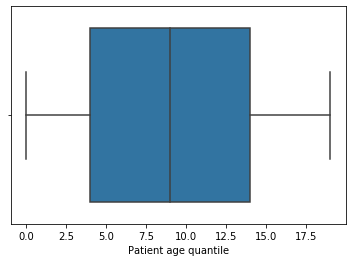

In [21]:
sns.boxplot(ds['Patient age quantile'])
plt.show()

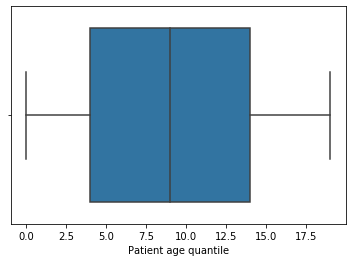

In [22]:
sns.boxplot(ds['Patient age quantile'])
plt.show()

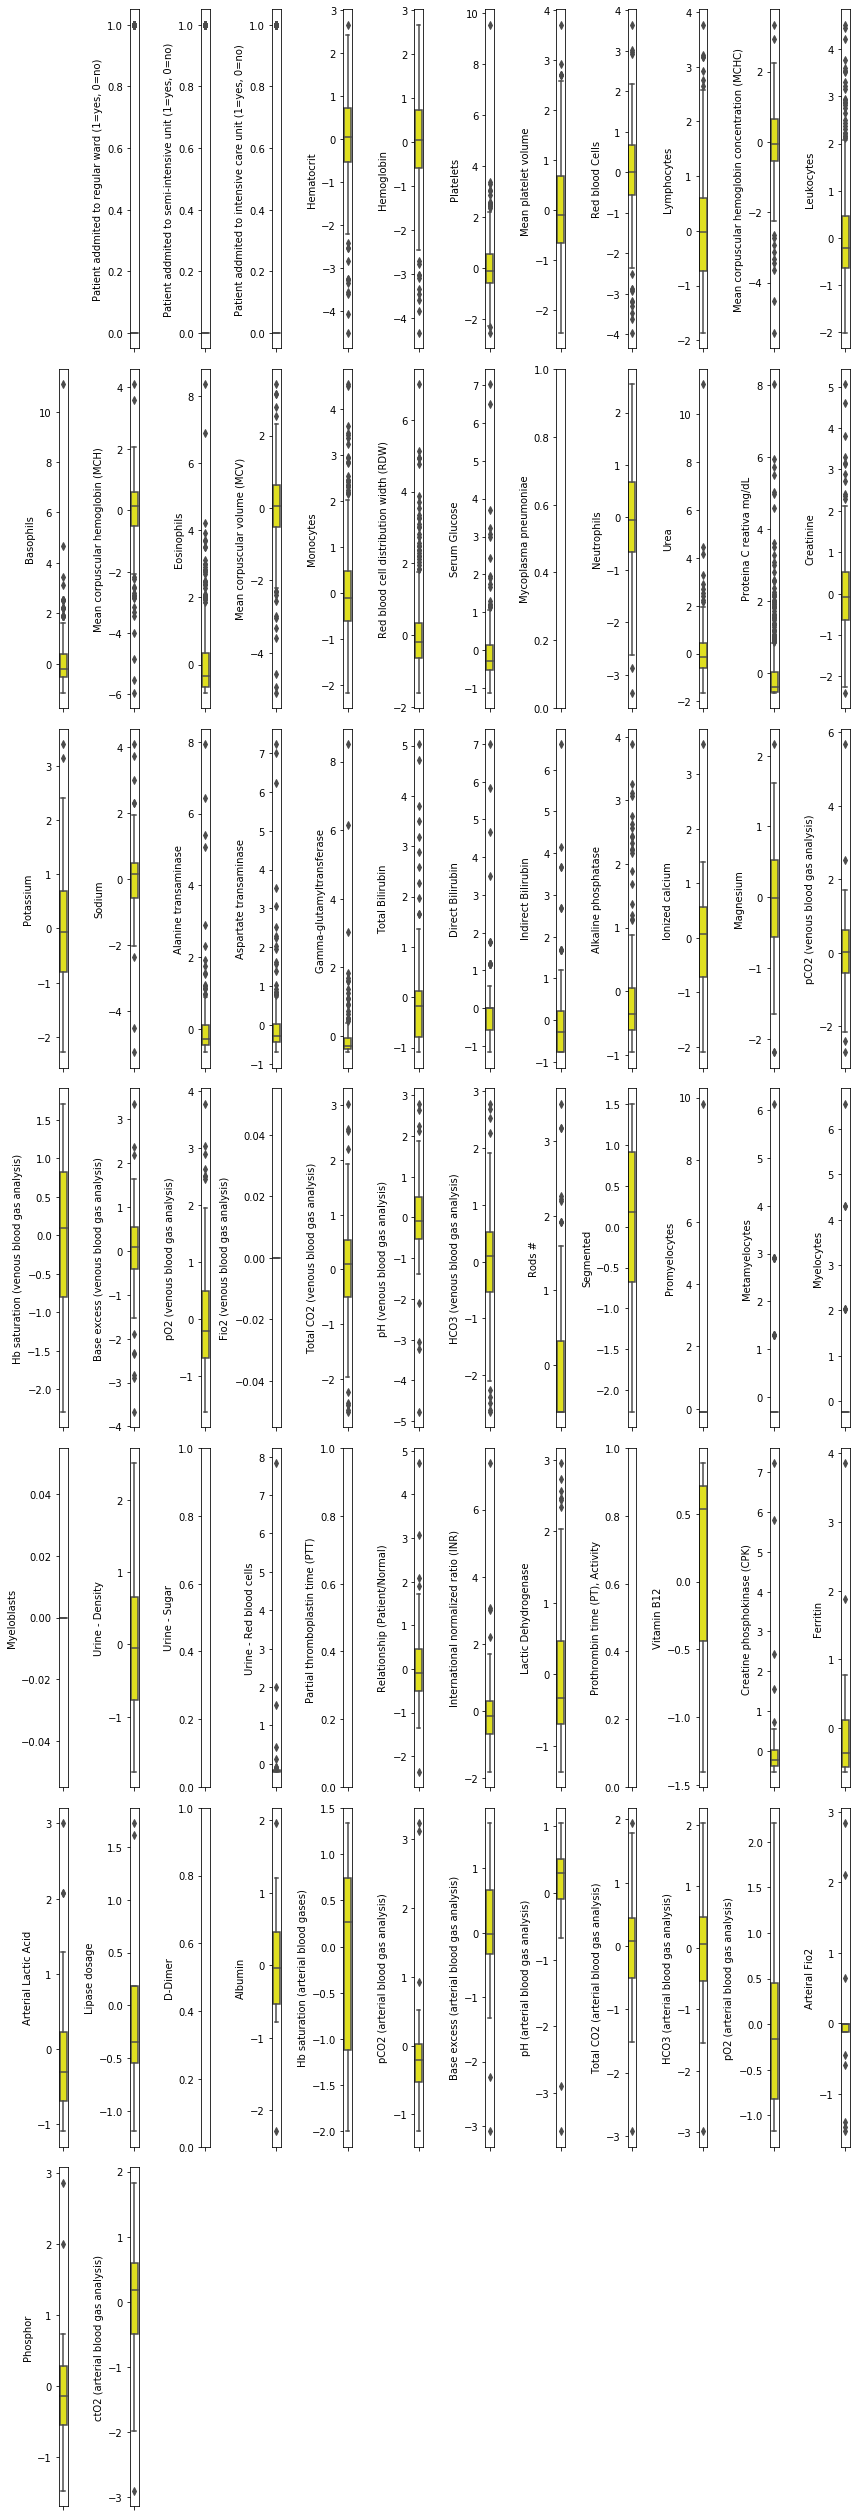

In [23]:
# Boxplot for all the columns
collist = ds_int.columns.values
nrows = 12
ncols =12

plt.figure(figsize=(ncols, 5*ncols))
for i in range(1, len(collist)):
    plt.subplot(nrows, ncols, i+1)
    sns.boxplot(ds_int[collist[i]], color='yellow', orient='v')
    plt.tight_layout()

It seems outliers are present into dataset

# Histogram

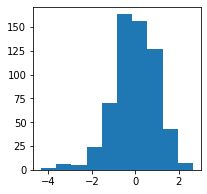

In [24]:
plt.figure(figsize=(3,3))
plt.hist(ds['Hemoglobin'])
plt.show()

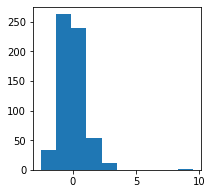

In [25]:
plt.figure(figsize=(3,3))
plt.hist(ds['Platelets'])
plt.show()

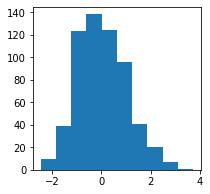

In [26]:
plt.figure(figsize=(3,3))
plt.hist(ds['Mean platelet volume '])
plt.show()

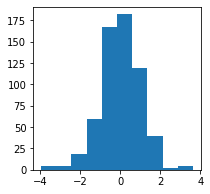

In [27]:
plt.figure(figsize=(3,3))
plt.hist(ds['Red blood Cells'])
plt.show()

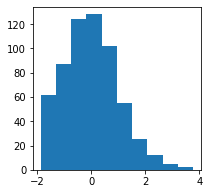

In [28]:
plt.figure(figsize=(3,3))
plt.hist(ds['Lymphocytes'])
plt.show()

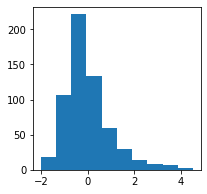

In [29]:
plt.figure(figsize=(3,3))
plt.hist(ds['Leukocytes'])
plt.show()

# Violinplot

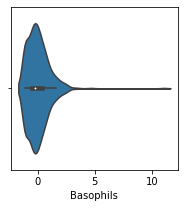

In [30]:
plt.figure(figsize=(3,3))
sns.violinplot(ds['Basophils'])
plt.show()

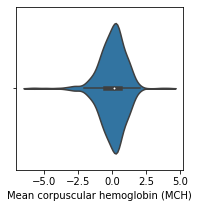

In [31]:
plt.figure(figsize=(3,3))
sns.violinplot(ds['Mean corpuscular hemoglobin (MCH)'])
plt.show()

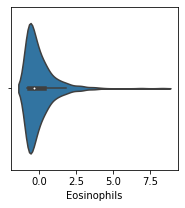

In [32]:
plt.figure(figsize=(3,3))
sns.violinplot(ds['Eosinophils'])
plt.show()

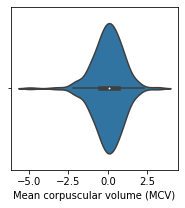

In [33]:
plt.figure(figsize=(3,3))
sns.violinplot(ds['Mean corpuscular volume (MCV)'])
plt.show()

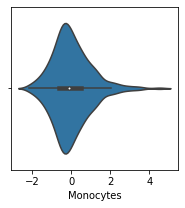

In [34]:
plt.figure(figsize=(3,3))
sns.violinplot(ds['Monocytes'])
plt.show()

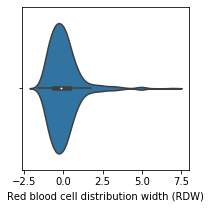

In [35]:
plt.figure(figsize=(3,3))
sns.violinplot(ds['Red blood cell distribution width (RDW)'])
plt.show()

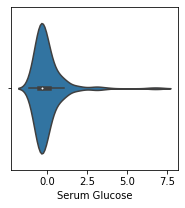

In [36]:
plt.figure(figsize=(3,3))
sns.violinplot(ds['Serum Glucose'])
plt.show()

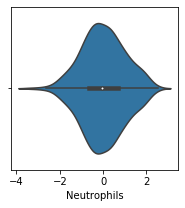

In [37]:
plt.figure(figsize=(3,3))
sns.violinplot(ds['Neutrophils'])
plt.show()

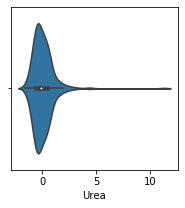

In [38]:
plt.figure(figsize=(3,3))
sns.violinplot(ds['Urea'])
plt.show()

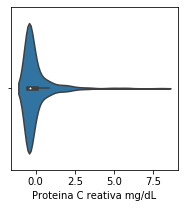

In [39]:
plt.figure(figsize=(3,3))
sns.violinplot(ds['Proteina C reativa mg/dL'])
plt.show()

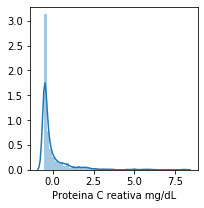

In [40]:
plt.figure(figsize=(3,3))
sns.distplot(ds['Proteina C reativa mg/dL'])
plt.show()

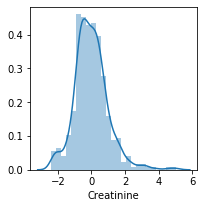

In [41]:
plt.figure(figsize=(3,3))
sns.distplot(ds['Creatinine'])
plt.show()

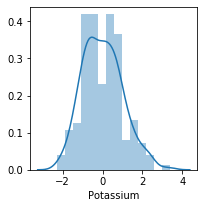

In [42]:
plt.figure(figsize=(3,3))
sns.distplot(ds['Potassium'])
plt.show()

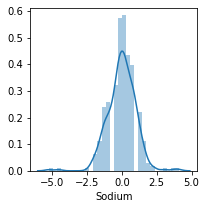

In [43]:
plt.figure(figsize=(3,3))
sns.distplot(ds['Sodium'])
plt.show()

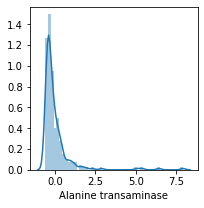

In [44]:
plt.figure(figsize=(3,3))
sns.distplot(ds['Alanine transaminase'])
plt.show()

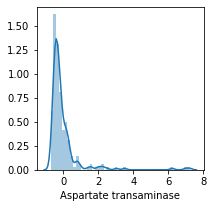

In [45]:
plt.figure(figsize=(3,3))
sns.distplot(ds['Aspartate transaminase'])
plt.show()

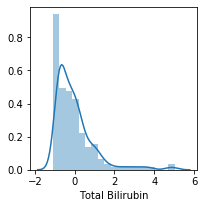

In [46]:
plt.figure(figsize=(3,3))
sns.distplot(ds['Total Bilirubin'])
plt.show()

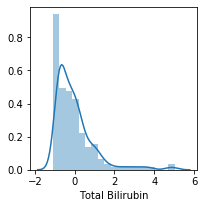

In [47]:
plt.figure(figsize=(3,3))
sns.distplot(ds['Total Bilirubin'])
plt.show()

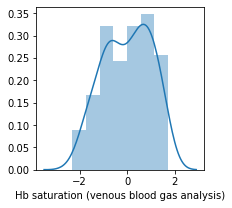

In [48]:
plt.figure(figsize=(3,3))
sns.distplot(ds['Hb saturation (venous blood gas analysis)'])
plt.show()

# Countplot

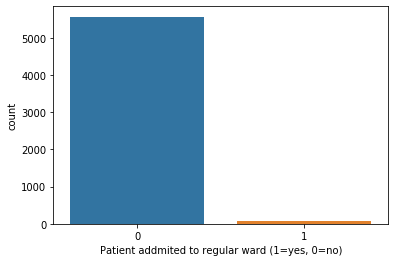

In [49]:
sns.countplot(ds['Patient addmited to regular ward (1=yes, 0=no)'])
plt.show()

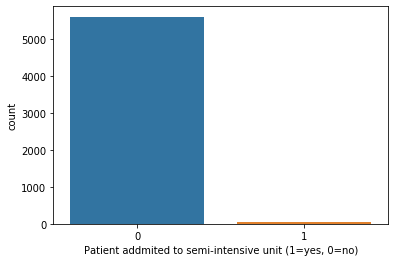

In [50]:
sns.countplot(ds['Patient addmited to semi-intensive unit (1=yes, 0=no)'])
plt.show()

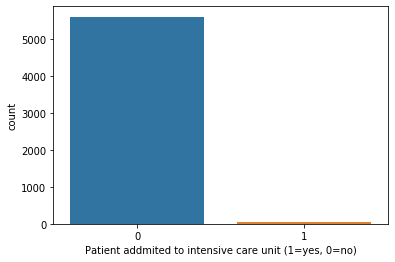

In [51]:
sns.countplot(ds['Patient addmited to intensive care unit (1=yes, 0=no)'])
plt.show()

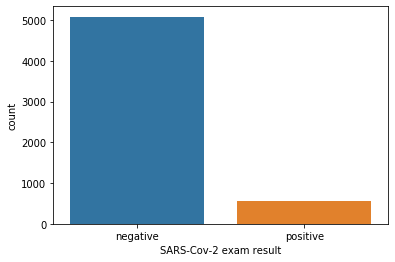

In [52]:
sns.countplot(ds['SARS-Cov-2 exam result'])
plt.show()

# Bivariate Analysis

Barplot

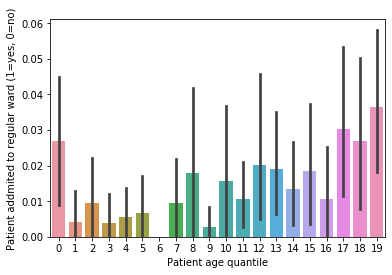

In [53]:
sns.barplot(x='Patient age quantile', y='Patient addmited to regular ward (1=yes, 0=no)' , data=ds)
plt.show()

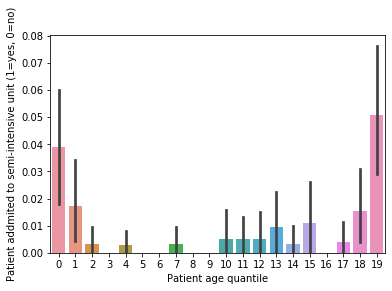

In [54]:
sns.barplot(x='Patient age quantile', y='Patient addmited to semi-intensive unit (1=yes, 0=no)' , data=ds)
plt.show()

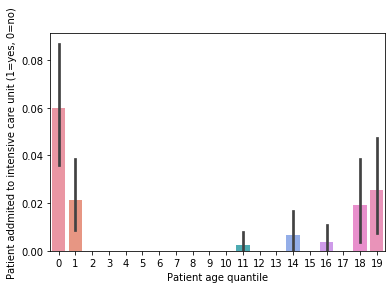

In [55]:
sns.barplot(x='Patient age quantile', y='Patient addmited to intensive care unit (1=yes, 0=no)' , data=ds)
plt.show()

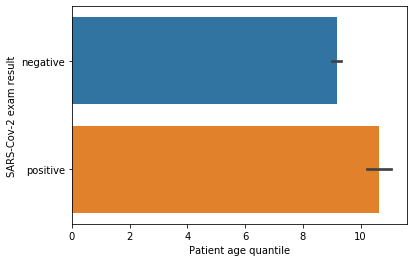

In [56]:
sns.barplot(x='Patient age quantile', y='SARS-Cov-2 exam result' , data=ds)
plt.show()

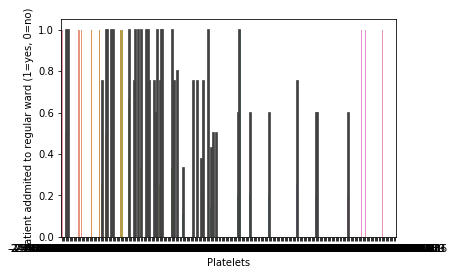

In [57]:
sns.barplot(x='Platelets', y='Patient addmited to regular ward (1=yes, 0=no)' , data=ds)
plt.show()

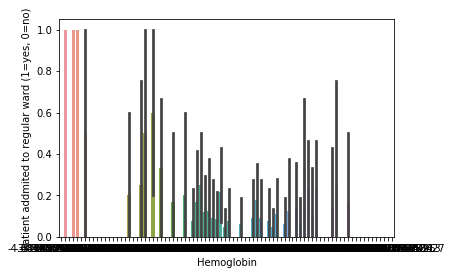

In [58]:
sns.barplot(x='Hemoglobin', y='Patient addmited to regular ward (1=yes, 0=no)' , data=ds)
plt.show()

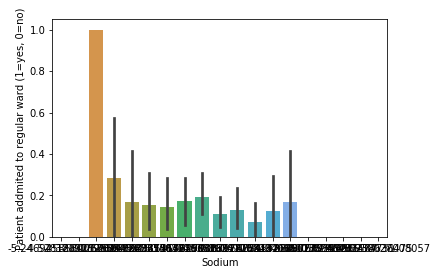

In [59]:
sns.barplot(x='Sodium', y='Patient addmited to regular ward (1=yes, 0=no)' , data=ds)
plt.show()

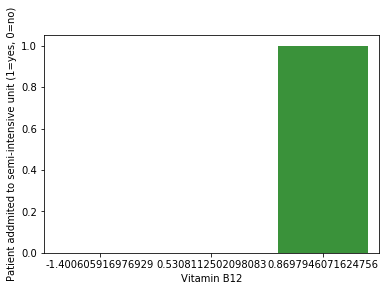

In [60]:
sns.barplot(x='Vitamin B12', y='Patient addmited to semi-intensive unit (1=yes, 0=no)' , data=ds)
plt.show()

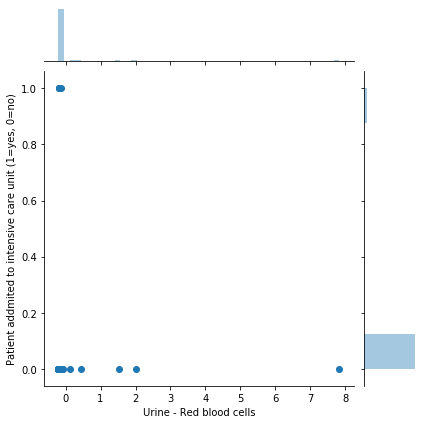

In [61]:
sns.jointplot(data=ds, x="Urine - Red blood cells", y="Patient addmited to intensive care unit (1=yes, 0=no)" )
plt.show()

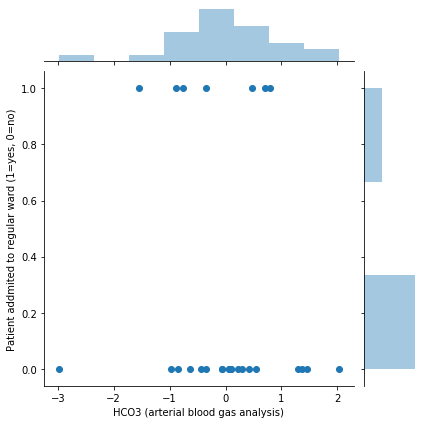

In [62]:
sns.jointplot(data=ds, x="HCO3 (arterial blood gas analysis)", y="Patient addmited to regular ward (1=yes, 0=no)" )
plt.show()

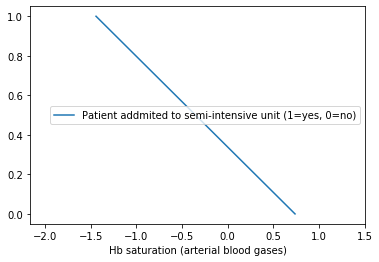

In [63]:
ds.plot(x='Hb saturation (arterial blood gases)', y='Patient addmited to semi-intensive unit (1=yes, 0=no)', kind = 'line')
plt.show()

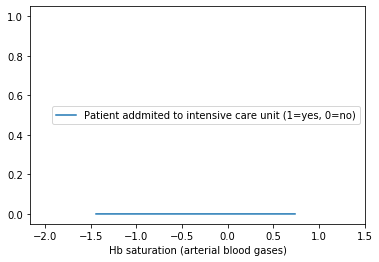

In [64]:
ds.plot(x='Hb saturation (arterial blood gases)', y='Patient addmited to intensive care unit (1=yes, 0=no)', kind = 'line')
plt.show()

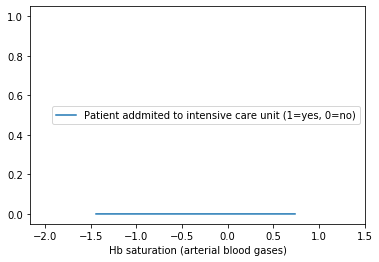

In [65]:
ds.plot(x='Hb saturation (arterial blood gases)', y='Patient addmited to intensive care unit (1=yes, 0=no)', kind = 'line')
plt.show()

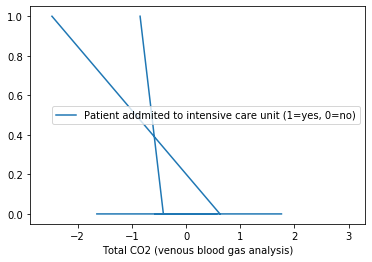

In [66]:
ds.plot(x='Total CO2 (venous blood gas analysis)', y='Patient addmited to intensive care unit (1=yes, 0=no)', kind = 'line')
plt.show()

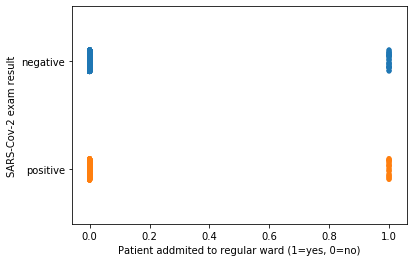

In [67]:
sns.stripplot(x='Patient addmited to regular ward (1=yes, 0=no)', y='SARS-Cov-2 exam result', data=ds)
plt.show()

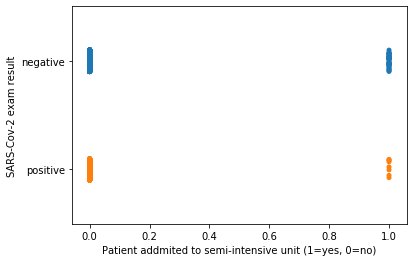

In [68]:
sns.stripplot(x='Patient addmited to semi-intensive unit (1=yes, 0=no)', y='SARS-Cov-2 exam result', data=ds)
plt.show()

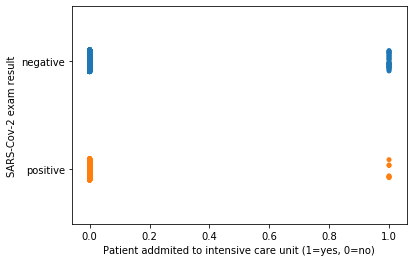

In [69]:
sns.stripplot(x='Patient addmited to intensive care unit (1=yes, 0=no)', y='SARS-Cov-2 exam result', data=ds)
plt.show()

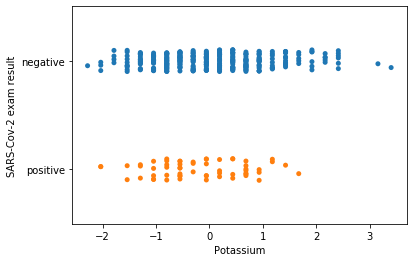

In [70]:
sns.stripplot(x='Potassium', y='SARS-Cov-2 exam result', data=ds)
plt.show()

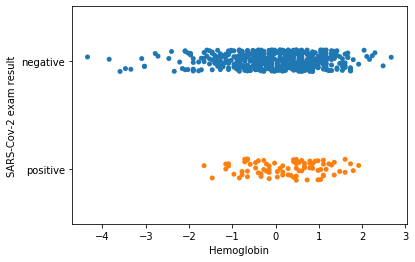

In [71]:
sns.stripplot(x='Hemoglobin', y='SARS-Cov-2 exam result', data=ds)
plt.show()

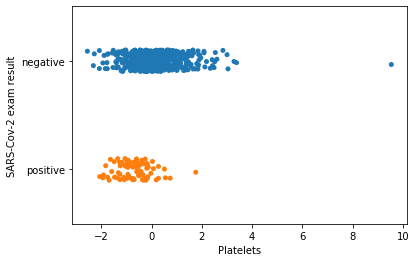

In [72]:
sns.stripplot(x='Platelets', y='SARS-Cov-2 exam result', data=ds)
plt.show()

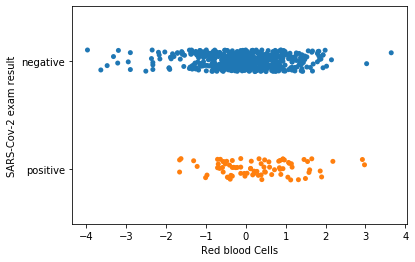

In [73]:
sns.stripplot(x='Red blood Cells', y='SARS-Cov-2 exam result', data=ds)
plt.show()

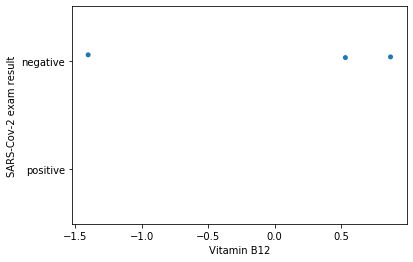

In [74]:
sns.stripplot(x='Vitamin B12', y='SARS-Cov-2 exam result', data=ds)
plt.show()

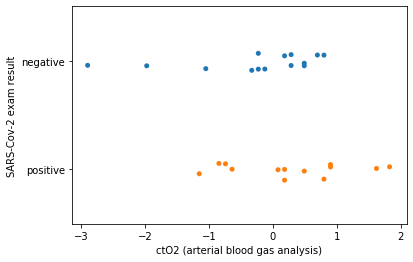

In [75]:
sns.stripplot(x='ctO2 (arterial blood gas analysis)', y='SARS-Cov-2 exam result', data=ds)
plt.show()

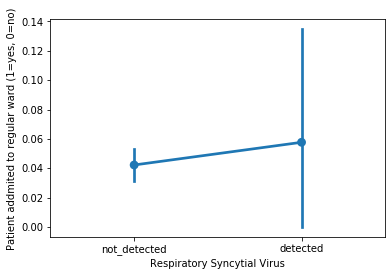

In [76]:
sns.pointplot(x='Respiratory Syncytial Virus', y='Patient addmited to regular ward (1=yes, 0=no)', data=ds)
plt.show()

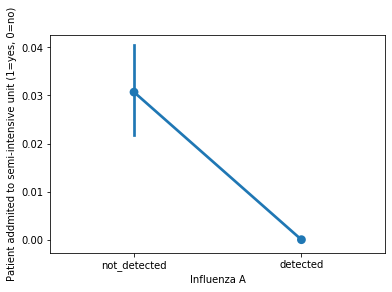

In [77]:
sns.pointplot(x='Influenza A', y='Patient addmited to semi-intensive unit (1=yes, 0=no)', data=ds)
plt.show()

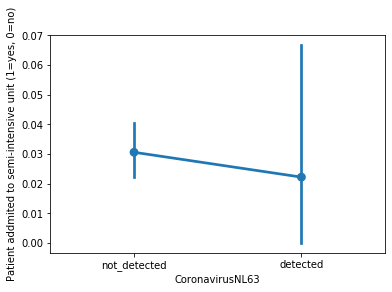

In [78]:
sns.pointplot(x='CoronavirusNL63', y='Patient addmited to semi-intensive unit (1=yes, 0=no)', data=ds)
plt.show()

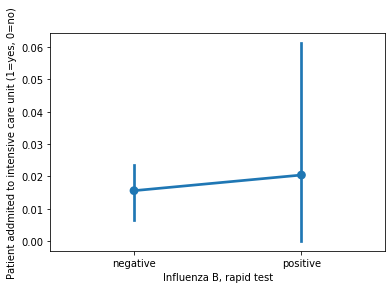

In [79]:
sns.pointplot(x='Influenza B, rapid test', y='Patient addmited to intensive care unit (1=yes, 0=no)', data=ds)
plt.show()

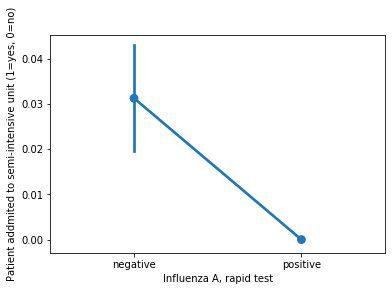

In [80]:
sns.pointplot(x='Influenza A, rapid test', y='Patient addmited to semi-intensive unit (1=yes, 0=no)', data=ds)
plt.show()

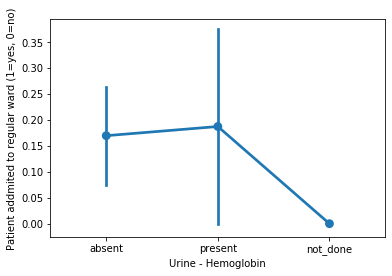

In [81]:
sns.pointplot(x='Urine - Hemoglobin', y='Patient addmited to regular ward (1=yes, 0=no)', data=ds)
plt.show()

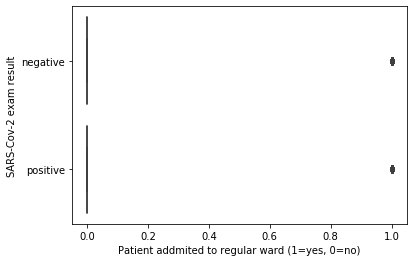

In [82]:
sns.boxplot(x='Patient addmited to regular ward (1=yes, 0=no)', y='SARS-Cov-2 exam result', data=ds)
plt.show()

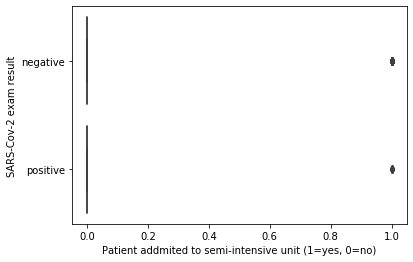

In [83]:
sns.boxplot(x='Patient addmited to semi-intensive unit (1=yes, 0=no)', y='SARS-Cov-2 exam result', data=ds)
plt.show()

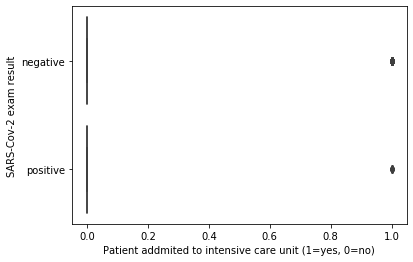

In [84]:
sns.boxplot(x='Patient addmited to intensive care unit (1=yes, 0=no)', y='SARS-Cov-2 exam result', data=ds)
plt.show()

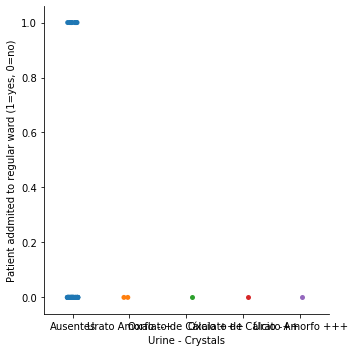

In [85]:
sns.catplot(x='Urine - Crystals', y='Patient addmited to regular ward (1=yes, 0=no)' ,data=ds)
plt.show()

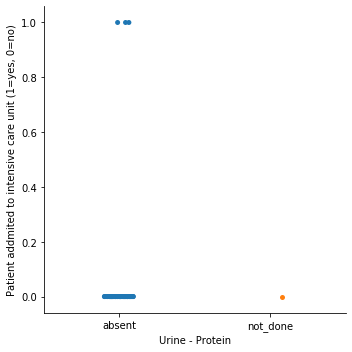

In [86]:
sns.catplot(x='Urine - Protein', y='Patient addmited to intensive care unit (1=yes, 0=no)' ,data=ds)
plt.show()

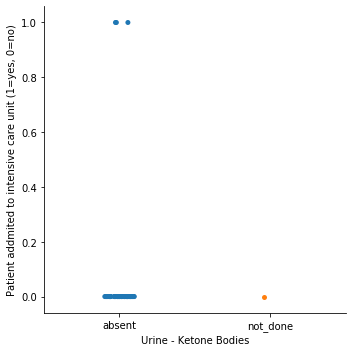

In [87]:
sns.catplot(x='Urine - Ketone Bodies', y='Patient addmited to intensive care unit (1=yes, 0=no)' ,data=ds)
plt.show()

In [88]:
# using LabelEncoder to change categorical data to number data
le = LabelEncoder()
for i in ds_cat:
    ds[i] = le.fit_transform(ds[i].astype(str))

In [89]:
ds.replace(np.nan, 0, inplace=True)

# Classification algorithm for 'SARS-Cov-2 exam result'

# Removing outliers

In [90]:
# Checking the 'z score' / outliers of the dataset, if present, will remove it
from scipy.stats import zscore

for i in ds.columns:
    ds_copy = ds.drop(i, axis=1 )
    z = np.abs(zscore(ds_copy))
    ds_new = ds_copy [(z<3).all(axis=1)]
    print (ds_new.shape, i)

(0, 110) Patient ID
(0, 110) Patient age quantile
(0, 110) SARS-Cov-2 exam result
(0, 110) Patient addmited to regular ward (1=yes, 0=no)
(0, 110) Patient addmited to semi-intensive unit (1=yes, 0=no)
(0, 110) Patient addmited to intensive care unit (1=yes, 0=no)
(0, 110) Hematocrit
(0, 110) Hemoglobin
(0, 110) Platelets
(0, 110) Mean platelet volume 
(0, 110) Red blood Cells
(0, 110) Lymphocytes
(0, 110) Mean corpuscular hemoglobin concentration (MCHC)
(0, 110) Leukocytes
(0, 110) Basophils
(0, 110) Mean corpuscular hemoglobin (MCH)
(0, 110) Eosinophils
(0, 110) Mean corpuscular volume (MCV)
(0, 110) Monocytes
(0, 110) Red blood cell distribution width (RDW)
(0, 110) Serum Glucose
(0, 110) Respiratory Syncytial Virus
(0, 110) Influenza A
(0, 110) Influenza B
(0, 110) Parainfluenza 1
(0, 110) CoronavirusNL63
(0, 110) Rhinovirus/Enterovirus
(0, 110) Mycoplasma pneumoniae
(0, 110) Coronavirus HKU1
(0, 110) Parainfluenza 3
(0, 110) Chlamydophila pneumoniae
(0, 110) Adenovirus
(0, 110) Par

In [91]:
ds.drop(columns=['Patient ID'], inplace=True)

Outliers are not removed as when we tried to remove it, not a single row will be 
avaialble for processing. Directly used the classification algorithm without removing the outliers.

In [92]:
# Assigning the input and output data
df_x = ds.drop(columns = ['SARS-Cov-2 exam result'])
y = ds['SARS-Cov-2 exam result']

In [93]:
# StandardScaler is used to scale the data
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [94]:
(x.shape, y.shape)

((5644, 109), (5644,))

In [95]:
y.unique()

array([0, 1])

# Classification Algorithm

In [96]:
# Subroutine to get the best random state with maximum accuracy score

def max_acu_score (regr, x, y):
    max_acu_score = 0
    for r_state in range (42, 100):

        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=r_state, test_size=.20)

        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)
        acu_scr = accuracy_score(y_test, y_pred)


        #print ("\n accuracy score corresponding to state: ", r_state, " is: ", acu_scr)
        if (acu_scr > max_acu_score):
            max_acu_score = acu_scr
            final_r_state = r_state
    print ("\nMax accuracy score corresponding to ", final_r_state, " is: ", max_acu_score)
    return final_r_state

In [97]:
# algorithms used for classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [98]:
KNN = KNeighborsClassifier()
SV = SVC()
DT = DecisionTreeClassifier()
RFC = RandomForestClassifier()

In [99]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('DecisionTraeeClassifier', DT))
models.append(('RandomForestClassifier', RFC))

****************** KNeighborsClassifier *********************



Max accuracy score corresponding to  70  is:  0.9238263950398583
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Predicted values:  [0 0 0 ... 0 0 0]


Accuracy score:  0.9238263950398583


cross val score:  0.9020203351534551


[0.         0.00670498 1.        ] [0.         0.07058824 1.        ] [2 1 0]
roc auc score:  0.5319416272256029


classification report:                precision    recall  f1-score   support

           0       0.93      0.99      0.96      1044
           1       0.46      0.07      0.12        85

    accuracy                           0.92      1129
   macro avg       0.70      0.53      0.54      1129
weighted avg       0.89      0.92      0.90      1129



[[1037    7]
 [  79    6]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************** SVC *

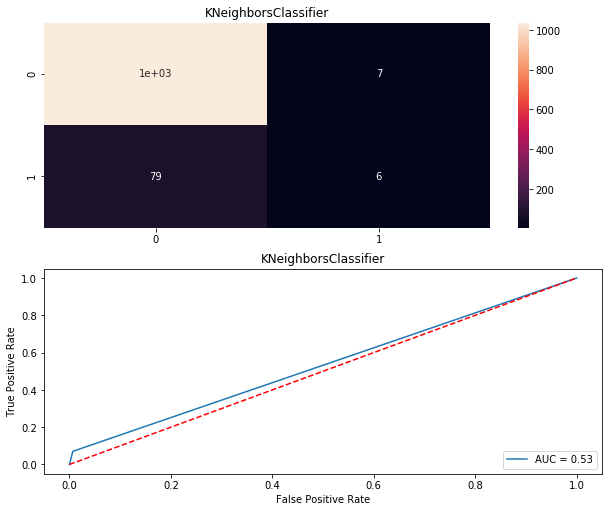

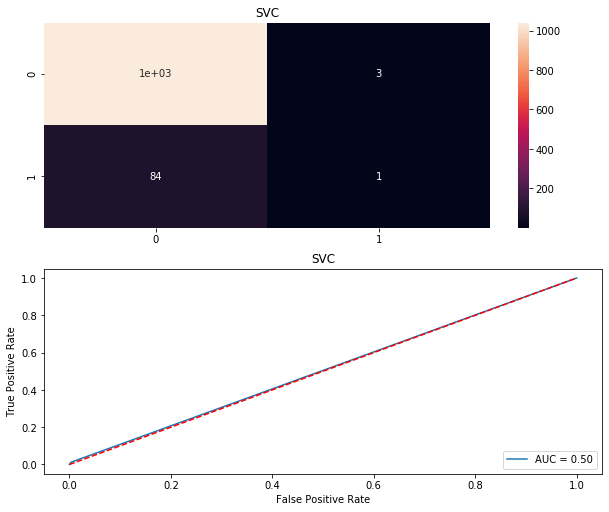

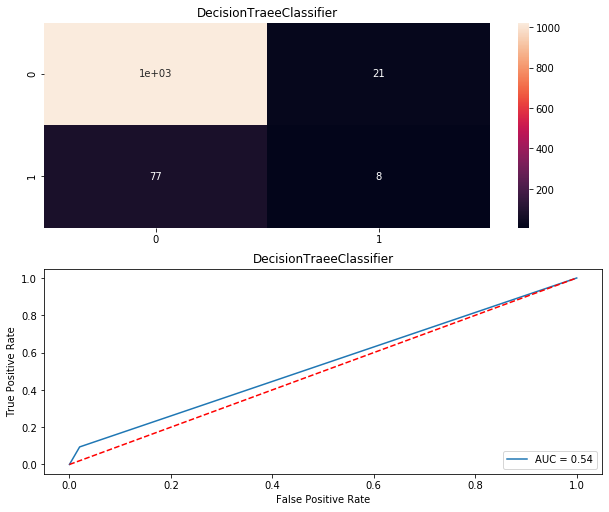

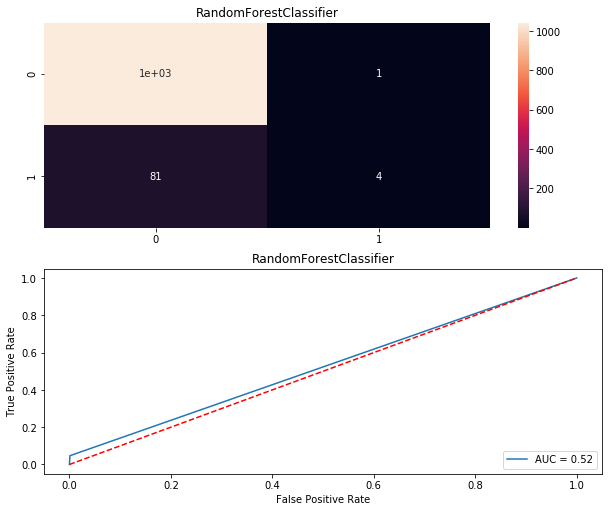

In [100]:
Model = []
score = []
cvs = []
rocscore = []
rstate = []

for name, model in models:    
    print ('******************', name , '*********************')
    print ("\n")
    
    model_state = max_acu_score(model, x, y)
    rstate.append(model_state)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = model_state, test_size = .20)
    
    Model.append(name)
    model.fit (x_train, y_train)
    print (model)
    
    pre = model.predict(x_test)
    print ("Predicted values: ", pre)
    print ('\n')
    
    AS = accuracy_score(y_test, pre)
    print ("Accuracy score: ", AS)
    score.append (AS*100)
    print ('\n')
    
    sc = cross_val_score(model, x, y, cv =10, scoring='accuracy').mean()
    print ("cross val score: ", sc)    
    cvs.append(sc*100)
    print ('\n')
    
    fpr, tpr, thresholds = roc_curve(y_test, pre, pos_label=1)
    print (fpr, tpr, thresholds)
    roc_auc = auc(fpr, tpr)
    print ("roc auc score: ", roc_auc)
    rocscore.append(roc_auc * 100)
    print ('\n')
    
    print ("classification report: ", classification_report (y_test, pre) )
    print ('\n')
    
    cm = confusion_matrix(y_test, pre)
    print (cm)
    print ('\n')
    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print (sns.heatmap(cm, annot=True))
     
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
    plt.plot ([0,1], [0,1], 'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print ('\n\n')

In [101]:
# Displaying the data in tabular form
result = pd.DataFrame({'Model': Model, 'Accuracy_Score': score, 'Cross Val Score' : cvs, 'ROC_AUC_Curve': rocscore, 'RandomState': rstate })
result

,Model,Accuracy_Score,Cross Val Score,ROC_AUC_Curve,RandomState
0,KNeighborsClassifier,92.382640,90.202034,53.194163,70
1,SVC,92.294066,90.201971,50.444557,70
2,DecisionTraeeClassifier,91.319752,89.440281,53.700135,70
3,RandomForestClassifier,92.736935,90.166635,52.305048,70


In [102]:
#Using the best model for gridsearchcv

parameters = {
    'n_estimators': [100, 150, 200, 250],
    'max_features': ['auto', 'sqrt', 'log2']
}

gsc = GridSearchCV(estimator = RFC, param_grid = parameters, cv=10)

In [103]:
gsc.fit(x,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [104]:
gsc.best_params_

{'max_features': 'sqrt', 'n_estimators': 250}

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=70, test_size = 0.20)
rfc = RandomForestClassifier(n_estimators=250, max_features='auto')
rfc.fit(x_train, y_train)
y_pred =  rfc.predict(x_test)
print (y_pred)

[0 0 0 ... 0 0 0]


In [106]:
# Saving the predicted values in csv files
dft = pd.DataFrame(y_pred)
dft.to_csv ('pred_brazilC.csv')

accuracy score:  0.9273693534100974
Classification Report : 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1044
           1       0.80      0.05      0.09        85

    accuracy                           0.93      1129
   macro avg       0.86      0.52      0.53      1129
weighted avg       0.92      0.93      0.90      1129

Confusion_matrix:  [[1043    1]
 [  81    4]]
cross val score:  0.9023755727107261
roc auc score:  0.5230504845616407
AxesSubplot(0.125,0.808774;0.62x0.0712264)





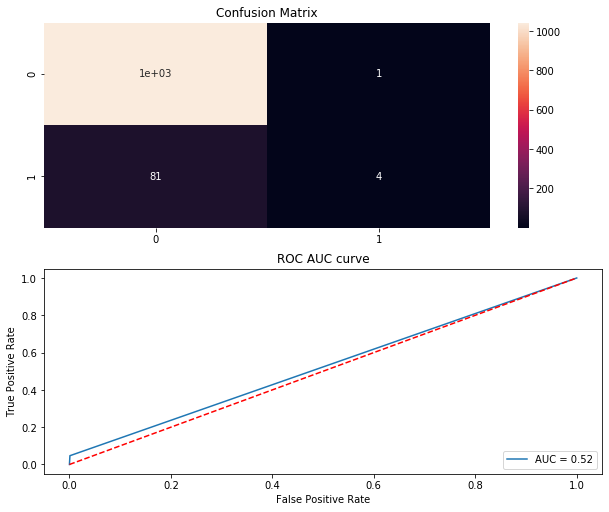

In [107]:
print ("accuracy score: ", accuracy_score(y_test, y_pred))
print ("Classification Report : \n", classification_report (y_test, y_pred))
print ("Confusion_matrix: ", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

sc = cross_val_score(rfc, x, y, cv =10, scoring='accuracy').mean()
print ("cross val score: ", sc)    

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)
print ("roc auc score: ", roc_auc)
   
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title("Confusion Matrix")
print (sns.heatmap(cm, annot=True))
     
plt.subplot(912)
plt.title("ROC AUC curve")
plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
plt.plot ([0,1], [0,1], 'r--')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print ('\n\n')

In [108]:
# saving the model 

from sklearn.externals import joblib
joblib.dump(rfc, 'Project_BrazilC.pkl')
#clf = joblib.load('Project_BrazilC.pkl')
#clf.predict(x_test)

['Project_BrazilC.pkl']

# Classification Algorithm for 'Patient admitted to which ward'

100: regular ward,semi-intensive unit,intensive care unit

Here,
100: Patient admitted to 'regular ward'  
010: Patient admitted to 'Semi intensive unit'  
001: Patient admitted to 'Intensive care unit'  
000: Patient not admitted to any ward  

Combining 3 column into 1, At a time, patient is admitted to only 1 ward

In [109]:
ds.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
ds["Ward"] = ds["Patient addmited to regular ward (1=yes, 0=no)"].map(str) + ds["Patient addmited to semi-intensive unit (1=yes, 0=no)"].map(str)+ds['Patient addmited to intensive care unit (1=yes, 0=no)'].map(str)

In [111]:
ds.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis),Ward
0,13,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,000
1,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,000
2,8,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,000
3,5,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,000
4,15,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,000


In [112]:
# Assigning the input and output data
df_x = ds.drop(columns = ['Patient addmited to regular ward (1=yes, 0=no)', 'Patient addmited to semi-intensive unit (1=yes, 0=no)',
                         'Patient addmited to intensive care unit (1=yes, 0=no)', 'Ward'])
y = ds['Ward']

In [113]:
# StandardScaler is used to scale the data
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x, columns=df_x.columns)

In [114]:
(x.shape, y.shape)

((5644, 107), (5644,))

In [115]:
y.unique()

array(['000', '010', '100', '001'], dtype=object)

Using LabelEncoder to convert 'y' column to number

In [116]:
y = le.fit_transform(y)

****************** KNeighborsClassifier *********************



Max accuracy score corresponding to  96  is:  0.9796279893711249
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Predicted values:  [0 0 0 ... 0 0 0]


Accuracy score:  0.9796279893711249


cross val score:  0.9695251992719515


[0.0000000e+00 8.9047195e-04 1.0000000e+00] [0.         0.16666667 1.        ] [4 3 0]
roc auc score:  0.5828880973582666


classification report:                precision    recall  f1-score   support

           0       0.98      1.00      0.99      1106
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        12

    accuracy                           0.98      1129
   macro avg       0.25      0.25      0.25      1129
weighted avg       0.96      0.98      

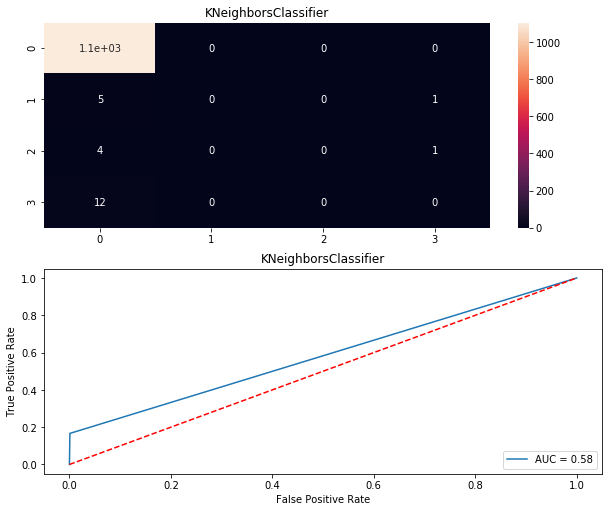

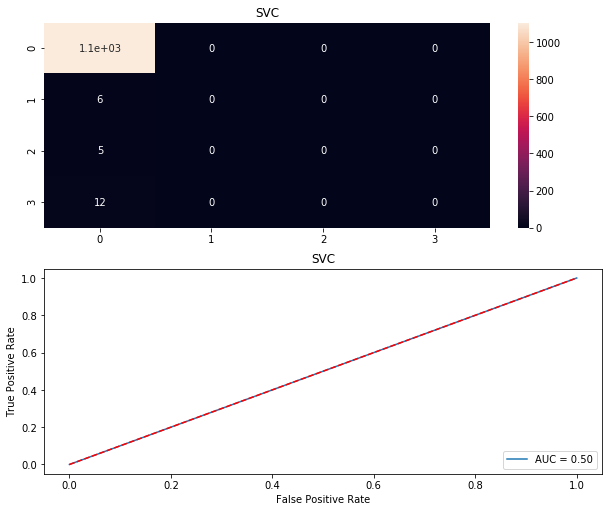

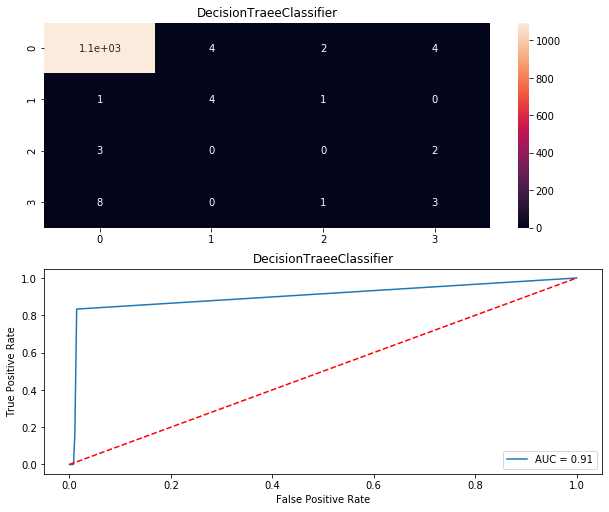

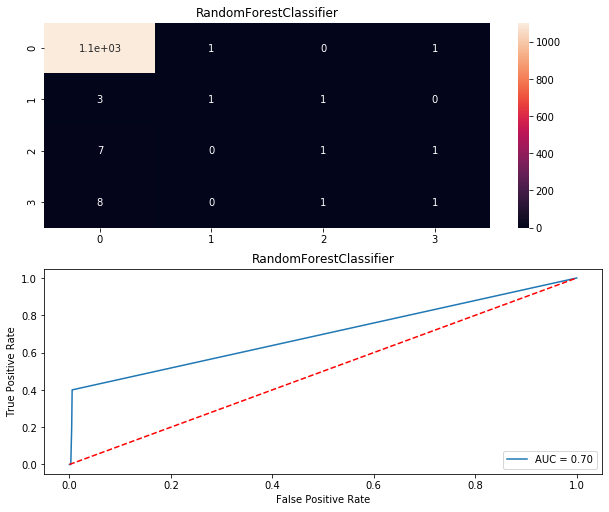

In [117]:
Model = []
score = []
cvs = []
rocscore = []
rstate = []

for name, model in models:    
    print ('******************', name , '*********************')
    print ("\n")
    
    model_state = max_acu_score(model, x, y)
    rstate.append(model_state)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = model_state, test_size = .20)
    
    Model.append(name)
    model.fit (x_train, y_train)
    print (model)
    
    pre = model.predict(x_test)
    print ("Predicted values: ", pre)
    print ('\n')
    
    AS = accuracy_score(y_test, pre)
    print ("Accuracy score: ", AS)
    score.append (AS*100)
    print ('\n')
    
    sc = cross_val_score(model, x, y, cv =10, scoring='accuracy').mean()
    print ("cross val score: ", sc)    
    cvs.append(sc*100)
    print ('\n')
    
    fpr, tpr, thresholds = roc_curve(y_test, pre, pos_label=1)
    print (fpr, tpr, thresholds)
    roc_auc = auc(fpr, tpr)
    print ("roc auc score: ", roc_auc)
    rocscore.append(roc_auc * 100)
    print ('\n')
    
    print ("classification report: ", classification_report (y_test, pre) )
    print ('\n')
    
    cm = confusion_matrix(y_test, pre)
    print (cm)
    print ('\n')
    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print (sns.heatmap(cm, annot=True))
     
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
    plt.plot ([0,1], [0,1], 'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print ('\n\n')

In [118]:
# Displaying the data in tabular form
result = pd.DataFrame({'Model': Model, 'Accuracy_Score': score, 'Cross Val Score' : cvs, 'ROC_AUC_Curve': rocscore, 'RandomState': rstate })
result

,Model,Accuracy_Score,Cross Val Score,ROC_AUC_Curve,RandomState
0,KNeighborsClassifier,97.962799,96.952520,58.288810,96
1,SVC,97.962799,96.987950,50.000000,96
2,DecisionTraeeClassifier,97.697077,96.173194,90.560997,96
3,RandomForestClassifier,97.962799,96.917122,69.670819,82


In [119]:
#Using the best model for gridsearchcv

parameters = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'poly', 'linear']} 

gsc = GridSearchCV(estimator = SVC(), param_grid = parameters, cv=10)

In [122]:
gsc

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=54, test_size = 0.20)
svc = SVC(C= 10, gamma= 0.01, kernel= 'rbf' )
svc.fit(x_train, y_train)
y_pred =  svc.predict(x_test)
print (y_pred)

[0 0 0 ... 0 0 0]


In [124]:
# Saving the predicted values in csv files
dft = pd.DataFrame(y_pred)
dft.to_csv ('pred_ward.csv')

accuracy score:  0.9672276350752879
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1093
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00        19

    accuracy                           0.97      1129
   macro avg       0.24      0.25      0.25      1129
weighted avg       0.94      0.97      0.95      1129

Confusion_matrix:  [[1092    0    0    1]
 [  14    0    0    0]
 [   3    0    0    0]
 [  19    0    0    0]]
cross val score:  0.969525513086048
roc auc score:  0.49955156950672647
AxesSubplot(0.125,0.808774;0.62x0.0712264)





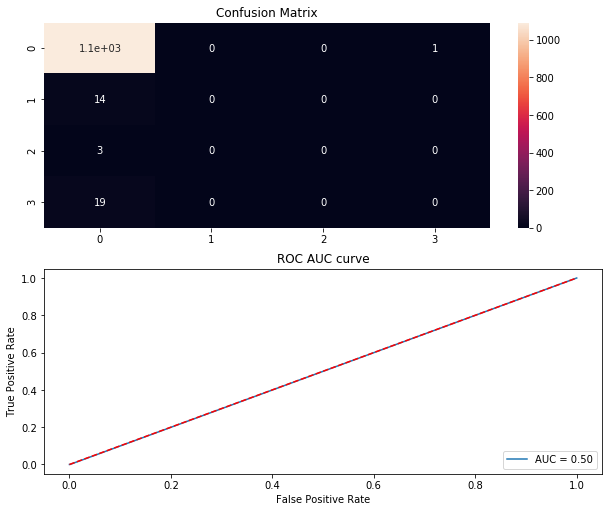

In [125]:
print ("accuracy score: ", accuracy_score(y_test, y_pred))
print ("Classification Report : \n", classification_report (y_test, y_pred))
print ("Confusion_matrix: ", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

sc = cross_val_score(svc, x, y, cv =10, scoring='accuracy').mean()
print ("cross val score: ", sc)    

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)
print ("roc auc score: ", roc_auc)
   
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title("Confusion Matrix")
print (sns.heatmap(cm, annot=True))
     
plt.subplot(912)
plt.title("ROC AUC curve")
plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
plt.plot ([0,1], [0,1], 'r--')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print ('\n\n')

In [126]:
# saving the model 
joblib.dump(svc, 'Project20_Brazil.pkl')
#clf = joblib.load('Project20_Brazil.pkl')
#clf.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])